# The Marine Ecosystem Reliance on Water Quality
## Powered by IBM Z LinuxOne
###### Areeb Abubaker, Jordan Bickelhaupt, Jack Dulla, Corey Hardesty, Yianni Mercer, Justus Sabik


### Marine Water Testing Timeseries
##### https://data.mfe.govt.nz/table/104052-ocean-acidification-state-1998-2017/

In [138]:
#import glob
#print(glob.glob("*.csv"))

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

In [140]:
df = pd.read_csv('ocean_acidification_nzoaon_rawcsv.csv')
df.columns

Index(['Site', 'Date (NZST)', 'T /oC', 'Salinity', 'DIC / umol kg-1',
       'AT / umol kg-1', 'pH (in situ, total scale)', 'carbonate  / umol kg-1',
       'Omega(aragonite)', 'Omega(calcite)'],
      dtype='object')

In [141]:
# [[0], [1], [2], [3], [4]] ...
rg = []
for i in range(5000):
    rg.append([i])

Number of entries: 781


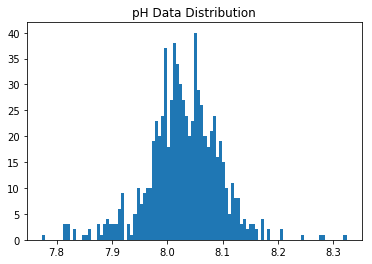

In [142]:
df['Date (NZST)'] = pd.to_datetime(df['Date (NZST)'], format='%Y-%m-%d %H:%M:%S')
df['Date (NZST)'] = (df['Date (NZST)'] - df['Date (NZST)'].min())  / np.timedelta64(1,'D')
#df['Date (NZST)'].min() = Timestamp('2014-06-17 00:00:00')
print(f'Number of entries: {len(df_ph)}')
plt.hist(x = df['pH (in situ, total scale)'].dropna(), bins = 100)
plt.title('pH Data Distribution')
plt.show()

Slope = [-0.00992186]


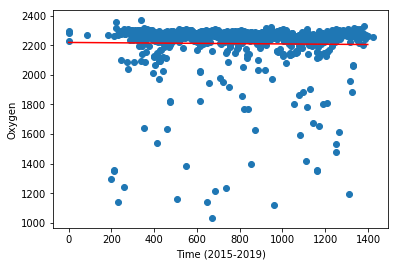

In [162]:
df_ph = pd.DataFrame(df, columns = ['Date (NZST)','AT / umol kg-1']).dropna()
x_date = df_ph['Date (NZST)'].values.reshape(-1, 1)
y_oxygen = df_ph['AT / umol kg-1'].values
model_ph = LinearRegression().fit(x_date,y_oxygen)
pred_oxygen = model_ph.predict(rg[0:1400])
plt.scatter(df_ph['Date (NZST)'].values.reshape(-1, 1),df_ph['AT / umol kg-1'])
plt.plot(pred_oxygen,color='red')
plt.ylabel('Oxygen')
print(f'Slope = {model_ph.coef_}')
plt.xlabel("Time (2015-2019)")
plt.show()

Slope = [-0.00992186]


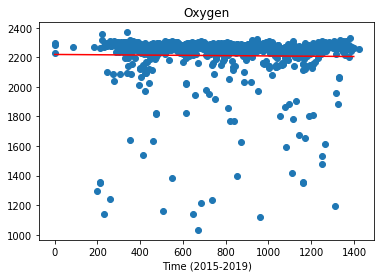

In [154]:
df_ph = pd.DataFrame(df, columns = ['Date (NZST)','AT / umol kg-1']).dropna()
x_date = df_ph['Date (NZST)'].values.reshape(-1, 1)
y = df_ph['AT / umol kg-1'].values
model_ph = LinearRegression().fit(x,y)
pred_oxygen = model_ph.predict(rg[0:1400])
plt.scatter(df_ph['Date (NZST)'].values.reshape(-1, 1),df_ph['AT / umol kg-1'])
plt.plot(pred_oxygen,color='red')
plt.title('Oxygen')
print(f'Slope = {model_ph.coef_}')
plt.xlabel("Time (2015-2019)")
plt.show()

Slope = [ 0.0014918]


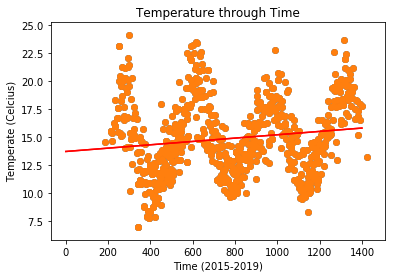

In [167]:
df_ph = pd.DataFrame(df, columns = ['Date (NZST)','T /oC']).dropna()
x_date = df_ph['Date (NZST)'].values.reshape(-1, 1)
y_temp_celcius = df_ph['T /oC'].values
model_ph = LinearRegression().fit(x_date,y_temp_celcius)
pred_temp = model_ph.predict(rg[0:1400])
plt.scatter(df_ph['Date (NZST)'].values.reshape(-1, 1),df_ph['T /oC'])
plt.plot(pred_temp,color='red')
print(f'Slope = {model_ph.coef_}')
plt.title('Temperature through Time')
plt.xlabel('Time (2015-2019)')
plt.ylabel('Temperate (Celcius)')
plt.show()

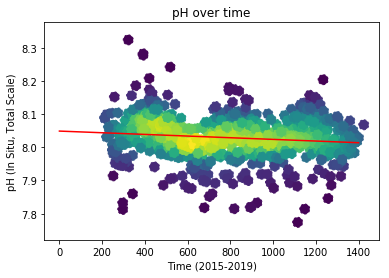

In [163]:
df_ph = pd.DataFrame(df, columns = ['Date (NZST)','pH (in situ, total scale)']).dropna()
x_date = df_ph['Date (NZST)'].values.reshape(-1, 1)
y_pH = df_ph['pH (in situ, total scale)'].values
model_ph = LinearRegression().fit(x_date,y_pH)
pred_pH = model_ph.predict(rg[0:1400])
slope = model_ph.coef_

x_kd_date = df_ph['Date (NZST)'].values
y_kd_pH = df_ph['pH (in situ, total scale)'].values
xy_date_pH = np.vstack([x_kd_date,y_kd_pH])
z_date_pH = gaussian_kde(xy_date_pH)(xy_date_pH)

plt.scatter(df_ph['Date (NZST)'].values.reshape(-1, 1),df_ph['pH (in situ, total scale)'], linestyle = 'dotted', c=z_date_pH, s=100)
plt.plot(pred_pH, color = 'red')
plt.title('pH over time')
plt.xlabel('Time (2015-2019)')
plt.ylabel('pH (In Situ, Total Scale)')
plt.show()

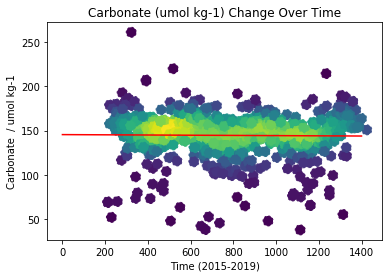

In [149]:
df_ph = pd.DataFrame(df, columns = ['Date (NZST)','carbonate  / umol kg-1']).dropna()
x_date = df_ph['Date (NZST)'].values.reshape(-1, 1)
y_carbonate = df_ph['carbonate  / umol kg-1'].values
model_ph = LinearRegression().fit(x_date,y_carbonate)
pred_carbonate = model_ph.predict(rg[0:1400])
model_ph.predict(2000)
model_ph.coef_

x_kde_date = df_ph['Date (NZST)'].values
y_kde_carbonate = df_ph['carbonate  / umol kg-1'].values
xy_date_carbonate = np.vstack([x_kde_date,y_kde_carbonate])
z_date_carbonate = gaussian_kde(xy_date_carbonate)(xy_date_carbonate)


plt.scatter(df_ph['Date (NZST)'].values.reshape(-1, 1),df_ph['carbonate  / umol kg-1'], linestyle = 'dotted', c =z_date_carbonate, s = 100)
plt.plot(pred_carbonate, color='red')
plt.title('Carbonate (umol kg-1) Change Over Time')
plt.xlabel('Time (2015-2019)')
plt.ylabel('Carbonate  / umol kg-1')


plt.show()

# Hidden impacts of ocean acidification to live and dead coral framework
#### https://doi.pangaea.de/10.1594/PANGAEA.860558

In [150]:
dfh = pd.read_csv('hold.csv')
dfh.columns
#len(dfh)
#dfh.head()

Index(['Type (study)', 'Species', 'Reg spec no', 'URL ref (WoRMS Aphia ID)',
       'Treat', 'Inc dur [months]', 'Inc dur [h]',
       'Calc rate CaCO3 [µmol/g/h]', 'Replicate (polyp no.)',
       'w [mm] (at polyp base)', 'h [mm] (polyp)',
       'Thick [mm] (wall thickness at base 1)',
       'Thick [mm] (wall thickness at base 2)', 'Area [cm**2] (inner)',
       'Height/width', 'Sample ID', 'Group (from dead or alive coral)',
       'Peak centre [1/cm]', 'FWHM', 'Peak height', 'Perc [%] (Gaussian)',
       'Peak area', 'Breaking load [N] (absolute)',
       'Ø [mm] (average diameter of coral at ...)',
       'Thick [mm] (average wall thickness at resin)',
       'Ratio (coral diameter / wall thickness)',
       'Breaking load [N] (normalized to coral diameter)',
       'Breaking load [N] (normalized to coral diameter ...)', 'ID (fragment)',
       'Resp O2 [µmol/g/h]', 'AT [µmol/kg] (Potentiometric titration)',
       'AT std dev [±] (Potentiometric titration)', 'DIC [µmol/kg]',
   

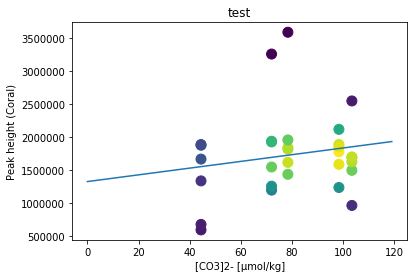

In [161]:
dfh_mm = pd.DataFrame(dfh, columns = ['[CO3]2- [µmol/kg] (Calculated using seacarb afte...)','Peak height']).dropna()
x_mm_co3 = dfh_mm['[CO3]2- [µmol/kg] (Calculated using seacarb afte...)'].values.reshape(-1, 1)
y_mm_peak = dfh_mm['Peak height'].values

model_co3 = LinearRegression().fit(x_mm_co3,y_mm_peak)

pred_mm = model_co3.predict(rg[0:120])

x_kd_co3 = dfh_mm['[CO3]2- [µmol/kg] (Calculated using seacarb afte...)'].values
y_kd_peak = dfh_mm['Peak height'].values
xy_co3_peak = np.vstack([x_kd_co3,y_kd_peak])
z_co3_peak = gaussian_kde(xy_co3_peak)(xy_co3_peak)

plt.scatter(dfh_mm['[CO3]2- [µmol/kg] (Calculated using seacarb afte...)'].values.reshape(-1, 1),dfh_mm['Peak height'].values,c=z_co3_peak, s=100)
plt.title('test')
plt.xlabel('[CO3]2- [µmol/kg]')
plt.ylabel('Peak height (Coral)')
plt.plot(pred_mm)
plt.show()